<a href="https://colab.research.google.com/github/komorimasashi/time_series_book/blob/main/chapter4/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rstanによる状態空間モデル

## パッケージのインストール（Stanを使い始める前に実行してください）

In [1]:
#必要なパッケージのインストール
targetPackages <- c('nlme','dplyr','tidyr', 'loo', 'rsample') 
newPackages <- targetPackages[!(targetPackages %in% installed.packages()[,"Package"])]
if(length(newPackages)) install.packages(newPackages)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘checkmate’, ‘matrixStats’, ‘furrr’, ‘slider’




In [2]:
#rstanがインストールされていないならインストールする（20分ほど要する）
x<-installed.packages()
if(any(x[,1]== 'rstan') == FALSE){
    system("add-apt-repository -y ppa:marutter/rrutter4.0")
    system("add-apt-repository -y ppa:c2d4u.team/c2d4u4.0+") 
    system("add-apt-repository ppa:cran/v8") 
    system("apt-get update") 
    system("apt-get install libnode-dev") 
    install.packages("rstan")
}
library('rstan')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘Rcpp’, ‘RcppParallel’, ‘RcppEigen’, ‘BH’


Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



## 4.1.4 RStan の使い方

In [3]:
# model1.stanの内容
#ここでstanのコードを文字列として変数に入れる
model1code <- '
data {
  int T;  //サンプリング点数
  vector[T] Y;  //観測値の時系列
}

parameters {
  vector[T] mu; //推定値μ
  real<lower=0> sigma_u;  //システムノイズ
  real<lower=0> sigma_v;  //観測ノイズ
}
model {
  mu[2:T] ~ normal(mu[1:(T-1)], sigma_u);  //システムモデル
  Y ~ normal(mu, sigma_v);  //観測モデル
}

generated quantities{
  vector[T+10] mu_all;
  vector[10] y_pred;
  mu_all[1:T] = mu;

  for(t in 1:10){
    mu_all[T+t] = normal_rng(mu_all[T+t-1], sigma_u);
    y_pred[t] = normal_rng(mu_all[T+t], sigma_v);
  }
}
 '



SAMPLING FOR MODEL 'ssm1' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.110829 seconds (Warm-up)
Chain 1:                0.114485 seconds (Sampling)
Chain 1:                0.22

Warning message:
“There were 15 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.08, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains fo

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
mu[1],69.8468203,0.004340202,0.1754821,69.41627111,69.77793003,69.8805012,69.9318686,70.1753185,1634.72814,1.0045381
mu[2],69.4503485,0.012573170,0.2214694,69.15418986,69.28744581,69.3772022,69.5733139,70.0039220,310.26878,1.0078653
mu[3],69.8335354,0.003931277,0.1613838,69.51939229,69.76116292,69.8069652,69.8999131,70.2129539,1685.20386,1.0004806
mu[4],70.3154500,0.007416446,0.1893800,69.84411338,70.23054443,70.3636107,70.4160344,70.6153174,652.04372,1.0018273
mu[5],70.4848586,0.009652696,0.2198926,69.88209985,70.38909219,70.5530416,70.6116990,70.8094026,518.94817,1.0037750
mu[6],70.2544043,0.005755867,0.1753665,69.82334171,70.17914878,70.2898117,70.3431385,70.5756676,928.26394,1.0027362
mu[7],69.9074206,0.003413400,0.1515596,69.58300255,69.84253127,69.8982869,69.9780004,70.2363765,1971.47964,0.9989429
mu[8],69.6218163,0.004788798,0.1619865,69.31228803,69.54766941,69.6034507,69.6884653,69.9939898,1144.20658,0.9989541
mu[9],69.2644119,0.012569301,0.2502923,68.95236620,69.10627825,69.1765712,69.3760173,69.9456053,396.52690,1.0057615
mu[10],69.5698860,0.006255455,0.1782478,69.27122238,69.47567595,69.5218450,69.6466070,70.0018180,811.95262,1.0008781


lp__ 
1.138359

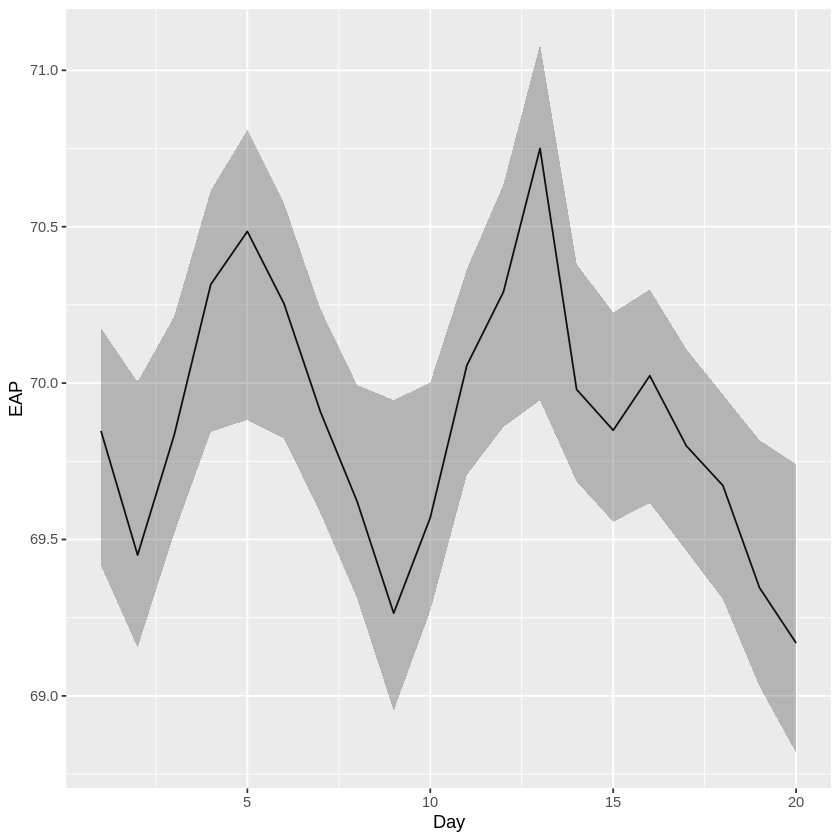

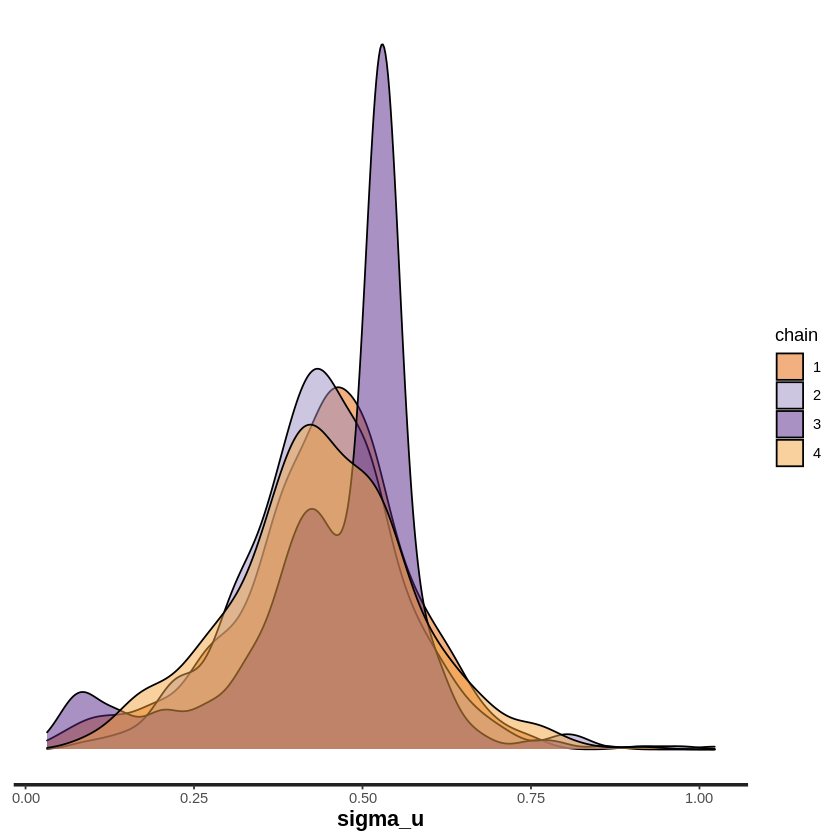

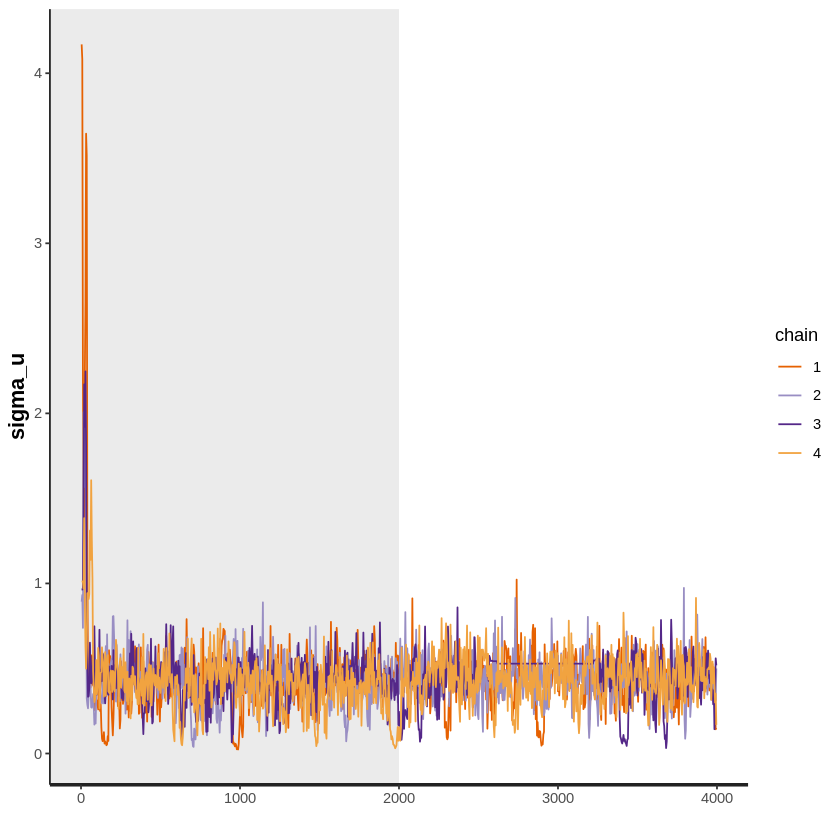

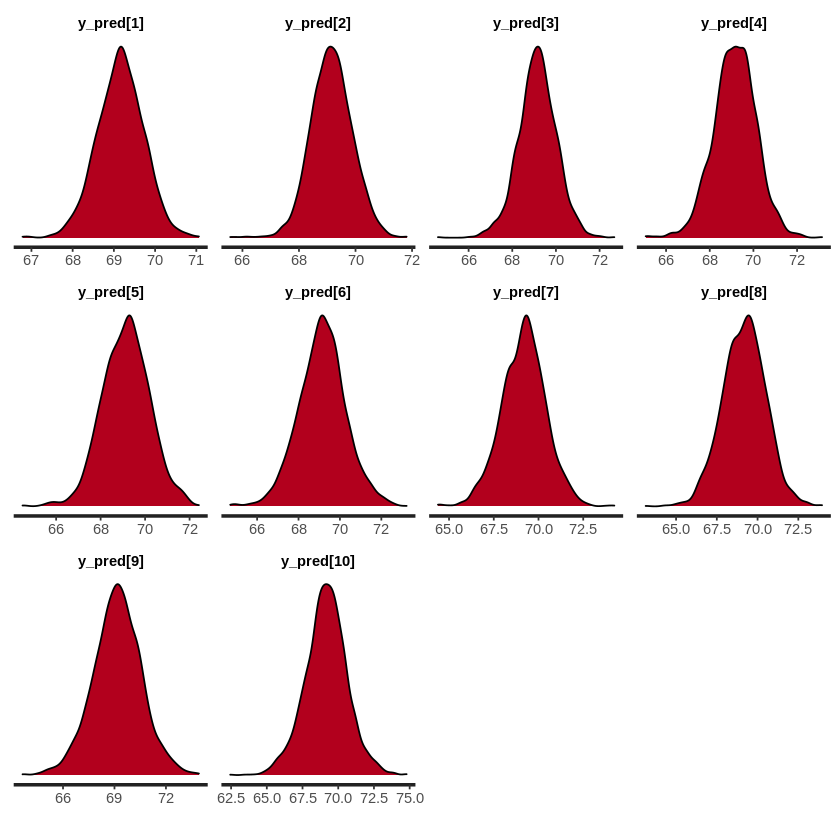

In [4]:
# 4.1.4 RStan の使い方

# 体重仮想データ
Y <- c(69.9, 69.3, 69.8, 70.4, 70.6, 70.3, 69.9, 69.6, 69.1, 69.5,
       70.1, 70.3, 71.0,69.9, 69.8, 70.1, 69.8, 69.7, 69.3, 69.1)

library(rstan) # ライブラリの読み込み

dat <- list(T=length(Y), Y=Y) # データはlist型にする

# Stanコードのコンパイル
model1 <- stan_model(model_code = model1code, model_name="ssm1")
# MCMCの実行
fit <- sampling(model1, data=dat, iter=4000, warmup=2000, thin=4,chains=4)
summary(fit)

# 収束診断
summary_fit <- summary(fit)$summary[,"Rhat"]
summary_fit[summary_fit > 1.1] # 収束していれば何も表示されない

# 事後期待値（EAP）と確信区間の算出
resultMCMC <- rstan::extract(fit)
mu_EAP <- apply(resultMCMC$mu,2,mean)
# 下側2.5%点
muLower95 <- apply(resultMCMC$mu,2,function(x) quantile(x,0.025))
# 上側2.5%点
muUpper95 <- apply(resultMCMC$mu,2,function(x) quantile(x,0.975))

# プロット(95%確信区間もプロットする)
result <- data.frame(Day=1:20,EAP=mu_EAP, lower=muLower95, upper=muUpper95)
g <- ggplot(data=result, aes(x=Day, y=EAP))
g <- g + geom_line(aes(y=EAP), lwd=.5)
g <- g +geom_ribbon(aes(ymin=lower,ymax=upper), alpha=.3)
plot(g)

# 事後分布の密度
stan_dens(fit, pars="sigma_u", separate_chains = TRUE)

# サンプリングの軌跡
stan_trace(fit, pars="sigma_u",inc_warmup =T)

# 事後分布の密度
stan_dens(fit, pars="y_pred", separate_chains = FALSE)

## 4.1.5 欠損値の補間と将来の予測は同じ

In [5]:
# model2.stanの内容
#ここでstanのコードを文字列として変数に入れる
model2code <- '
data {
  int T;  //サンプリング点数
  int P;  //予測をしたい日数
  vector[T] Y;  //観測値の時系列
}

parameters {
  vector[T+P] mu; //推定値μ
  real<lower=0> sigma_u;  //システムノイズ
  real<lower=0> sigma_v;  //観測ノイズ
}

model {
  mu[2:(T+P)] ~ normal(mu[1:(T+P-1)], sigma_u);  //システムモデル
  for (i in 1:T){
    if(Y[i]!=9999){
      Y[i] ~ normal(mu[i], sigma_v);  //観測モデル
    }
  }
}
'

In [6]:
# 4.1.5 欠損値の補間と将来の予測は同じ

# 体重仮想データ
Y <- c(69.9, 69.3, 69.8, 70.4, 70.6, 70.3, 9999, 69.6, 69.1, 69.5,
70.1, 70.3,71.0, 9999, 69.8, 70.1, 69.8, 69.7, 69.3, 69.1)

dat <- list(T=length(Y), P=10, Y=Y) # データはリスト型にする
# Stanコードのコンパイル
model2 <- stan_model(model_code = model2code, model_name="ssm2")

# MCMCの実行
fit <- sampling(model2, data=dat, iter=4000, warmup=2000, thin=4, chains=4)


SAMPLING FOR MODEL 'ssm2' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.39632 seconds (Warm-up)
Chain 1:                0.264472 seconds (Sampling)
Chain 1:                0.660

Warning message:
“There were 7 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“There were 1 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


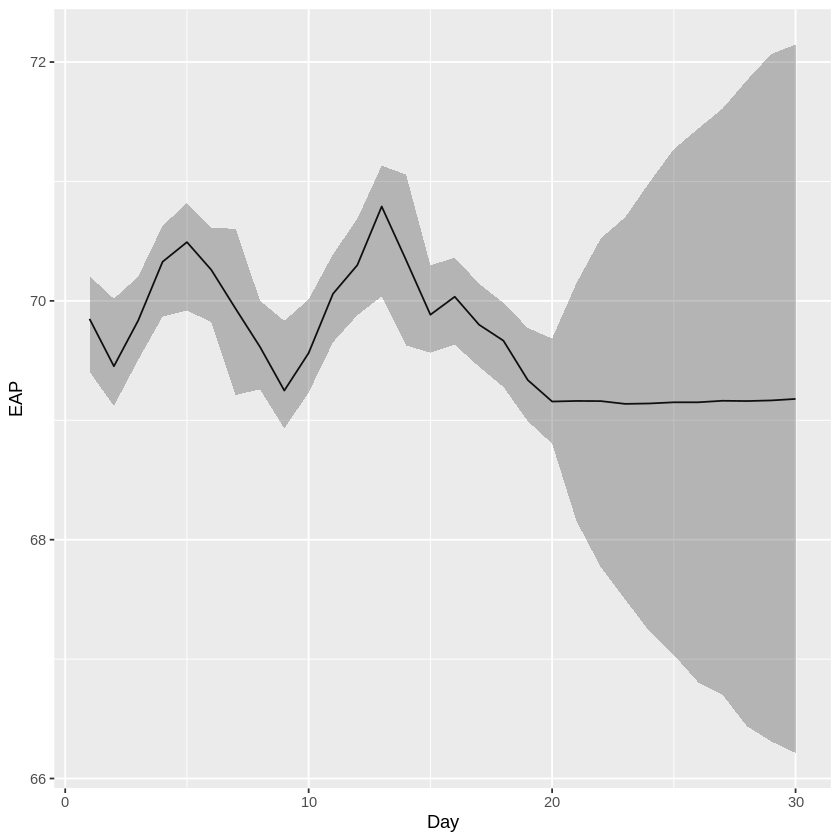

In [7]:
# 図4.9の作図

# 事後期待値（EAP）と確信区間の算出
resultMCMC <- rstan::extract(fit)
mu_EAP <- apply(resultMCMC$mu,2,mean)
# 下側2.5%点
muLower95 <- apply(resultMCMC$mu,2,function(x) quantile(x,0.025))
# 上側2.5%点
muUpper95 <- apply(resultMCMC$mu,2,function(x) quantile(x,0.975))

# プロット(95%確信区間もプロットする)
result <- data.frame(Day=1:30,EAP=mu_EAP, lower=muLower95, upper=muUpper95)
g <- ggplot(data=result, aes(x=Day, y=EAP))
g <- g + geom_line(aes(y=EAP), lwd=.5)
g <- g +geom_ribbon(aes(ymin=lower,ymax=upper), alpha=.3)
plot(g)

## 4.2.1 状態空間モデルの基本的な書き方

In [8]:
# model3.stanの内容
#ここでstanのコードを文字列として変数に入れる
model3code <- '
data {
  int N;  //サンプリング点数
  int N_pred; //予測点の個数
  vector[N] Y;  //観測値の時系列
}

parameters {
  vector[N] mu; // 推定値μ
  real<lower=0> sigma_S; // システムノイズ 
  real<lower=0> sigma_O; // 観測ノイズ
}

model {
  sigma_S ~ cauchy(0,5);  // 事前分布 
  sigma_O ~ cauchy(0,5);  // 事前分布
  mu[2:N] ~ normal(mu[1:(N-1)], sigma_S);  // システムモデル
   Y ~ normal(mu, sigma_O);  // 観測モデル
}


// ここ以下は将来予測のためのコード（本には載っていない）
generated quantities {
  vector[N+N_pred] mu_all;
  vector[N_pred] y_pred;
  mu_all[1:N] = mu;
  for (n in 1:N_pred) {
    mu_all[N+n] = normal_rng(mu_all[N+n-1], sigma_S);
    y_pred[n] = normal_rng(mu_all[N+n], sigma_O);
  }
}

'

In [9]:
# model4.stanの内容
#ここでstanのコードを文字列として変数に入れる
model4code <- '
data {
  int N;  //サンプリング点数
  int N_pred; //予測点の個数
  vector[N] Y;  //観測値の時系列

}

parameters {
  vector[N] mu; // 推定値μ
  vector[N] v;  // トレンド
  real<lower=0> sigma_S;  // システムノイズ(レベル)
  real<lower=0> sigma_V;  // システムノイズ(トレンド)
  real<lower=0> sigma_O;  // 観測ノイズ
}

model {
  sigma_S ~ cauchy(0,5);  // 事前分布 
  sigma_V ~ cauchy(0,5);  // 事前分布
  sigma_O ~ cauchy(0,5);  // 事前分布

  //システムモデル
  for(t in 2:N){
    mu[t] ~ normal(mu[t-1]+v[t-1], sigma_S);
    v[t] ~ normal(v[t-1], sigma_V); 
  }

  //観測モデル
  Y ~ normal(mu, sigma_O);
}

// ここ以下は将来予測のためのコード（本には載っていない）
generated quantities {
  vector[N+N_pred] mu_all;
  vector[N+N_pred] v_all;
  vector[N_pred] y_pred;
  mu_all[1:N] = mu;
  v_all[1:N] = v;
  
  for (n in 1:N_pred) {
    mu_all[N+n] = normal_rng(mu_all[N+n-1]+v_all[N+n-1], sigma_S);
    v_all[N+n] = normal_rng(v_all[N+n-1], sigma_V);
    y_pred[n] = normal_rng(mu_all[N+n], sigma_O);
  }
}

'

In [32]:
# model5.stanの内容
#ここでstanのコードを文字列として変数に入れる
model5code <- '
data {
  int N;  //時点数
  int N_pred; //予測点の個数
  vector[N] Y;
}

parameters {
  vector[N] mu;
  vector[N] season; // 季節成分
  real<lower=0> sigma_W;  //システムノイズ
  real<lower=0> sigma_S;  // 季節調整項12ヵ月分の合計のばらつき
  real<lower=0> sigma_O;  // 観測ノイズ
}

transformed parameters{
  vector[N] y_mean;
  y_mean = mu + season;
}

model {
  mu[2:N] ~ normal(mu[1:(N-1)], sigma_W);  // システムモデル
  for(t in 12:N)
    season[t] ~ normal(-sum(season[(t-11):(t-1)]), sigma_S);   // 季節成分のシステムモデル
  Y ~ normal(y_mean, sigma_O);  // 観測モデル
}

// ここ以下は将来予測のためのコード（本には載っていない）
generated quantities {
  vector[N+N_pred] mu_all;
  vector[N+N_pred] season_all;
  vector[N_pred] y_pred;
  vector[N+N_pred] y_mean_all;
  mu_all[1:N] = mu;
  season_all[1:N] = season;
  y_mean_all[1:N] = mu+season;
  
  for (n in 1:N_pred) {
    mu_all[N+n] = normal_rng(mu_all[N+n-1], sigma_W);
    season_all[N+n] = normal_rng(-sum(season_all[N+n-11:N+n-1]), sigma_S);  //季節成分のシステムモデル
    y_pred[n] = normal_rng(mu_all[N+n]+season_all[N+n], sigma_O);
    y_mean_all[N+n] = mu_all[N+n] + season_all[N+n];
  }
  
}

'

Warning message in (runif(1) * 2 - 1) * cos(i * t) + (runif(1) * 2 - 1) * sin(i * :
“longer object length is not a multiple of shorter object length”
Warning message in (runif(1) * 2 - 1) * cos(i * t) + (runif(1) * 2 - 1) * sin(i * :
“longer object length is not a multiple of shorter object length”


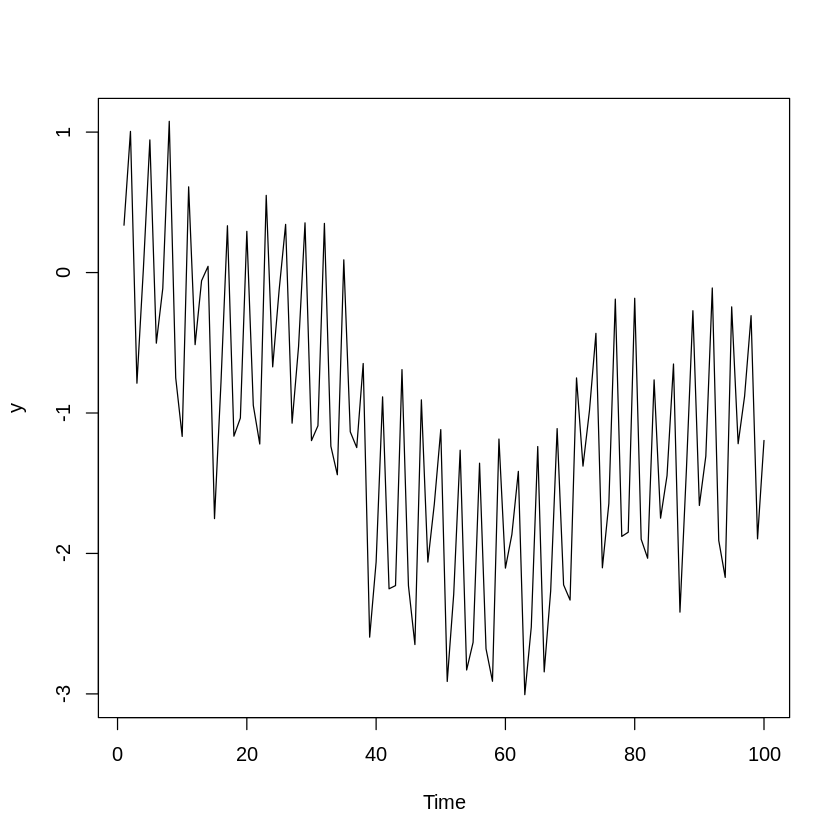

In [33]:
# 4.2.1 状態空間モデルの基本的な書き方

# 仮想データの作成
set.seed(1234)
N <- 100 # 期間
mu_0 <- 0 # 状態初期値
mu_T <- 0 # トレンドの平均値
sigma_O <- .1 # 観測ノイズの標準偏差
sigma_W <- .1 # システムノイズの標準偏差
sigma_T <- .1 #トレンドの標準偏差
mu <- numeric(N)
# 初期値
mu[1] <- mu_0
# 傾き
trend <- rnorm(n = N-1, mean = mu_T, sd = sigma_T)
for(i in 2:N){
  mu[i] <- rnorm(n = 1, mean = mu[i-1] + trend[i-1] , sd = sigma_W)
}
# 周期成分を適当に作成しこれを季節成分とする
# 12ヵ月周期のフーリエ級数の第2調和まで考慮している
# 100ヵ月分の周期成分を作成
p <- numeric(N)
t <- 1:12
for(i in 1:2){
  p <- (runif(1)*2-1) * cos(i*t) + (runif(1)*2-1) * sin(i*t) + p
}
y <- rnorm(n = N, mean = mu+p, sigma_O)
ts.plot(y)
# リスト化
dat <- list(N=length(y), Y=y, N_pred = 20)



In [34]:
# Stanコードコンパイルと実行
model3 <- stan_model(model_code = model3code, model_name="ssm3")
fit3 <- sampling(model3, data=dat, iter=4000, warmup=2000, thin=4, chains=4)
model4 <- stan_model(model_code = model4code, model_name="ssm4")
fit4 <- sampling(model4, data=dat, iter=4000, warmup=2000, thin=4, chains=4)
model5 <- stan_model(model_code = model5code, model_name="ssm5")
fit5 <- sampling(model5, data=dat, iter=4000, warmup=2000, thin=4, chains=4)


SAMPLING FOR MODEL 'ssm3' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.42 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.03683 seconds (Warm-up)
Chain 1:                0.900633 seconds (Sampling)
Chain 1:                1.937

Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”



SAMPLING FOR MODEL 'ssm4' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.4 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 12.667 seconds (Warm-up)
Chain 1:                10.0586 seconds (Sampling)
Chain 1:                22.7257 se

Warning message:
“There were 809 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”
Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.4, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more ite


SAMPLING FOR MODEL 'ssm5' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 19.3787 seconds (Warm-up)
Chain 1:                18.5844 seconds (Sampling)
Chain 1:                37.963

Warning message:
“There were 24 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“There were 36 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”
Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.11, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https

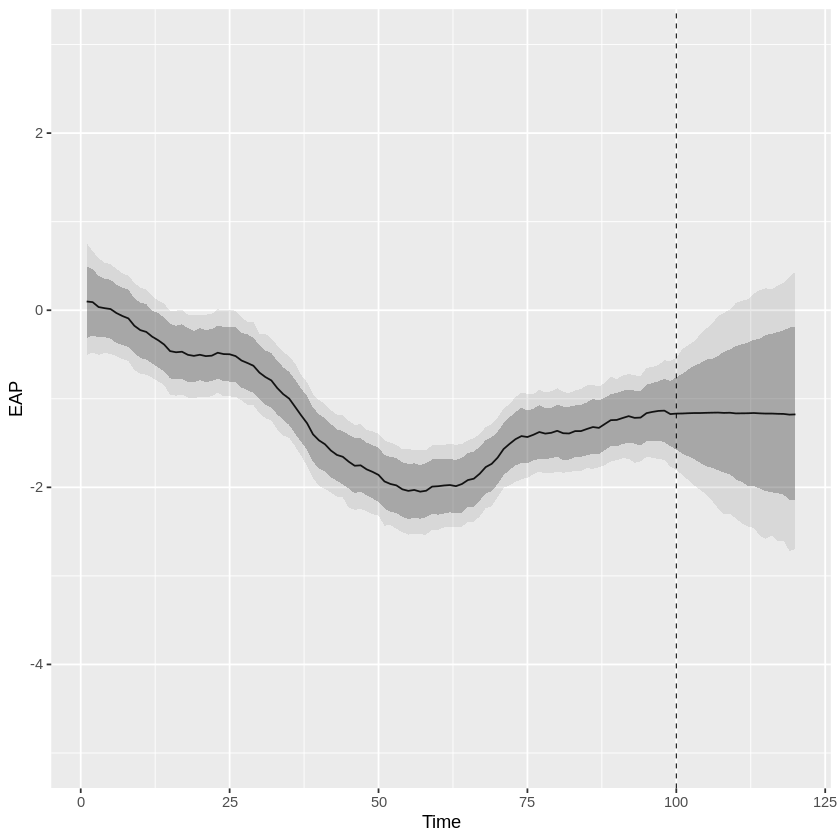

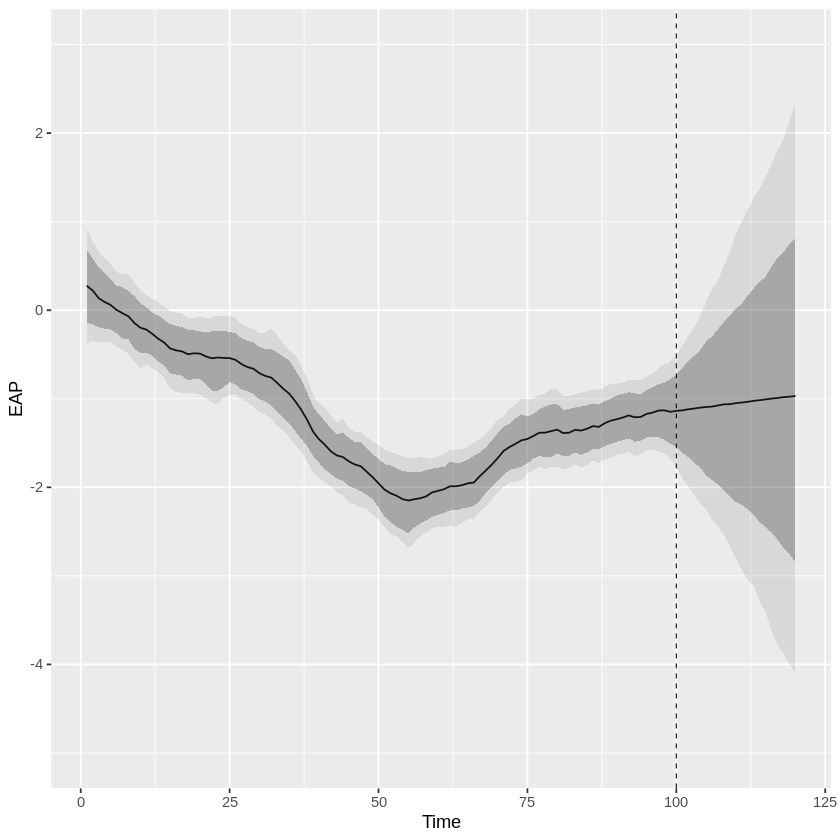

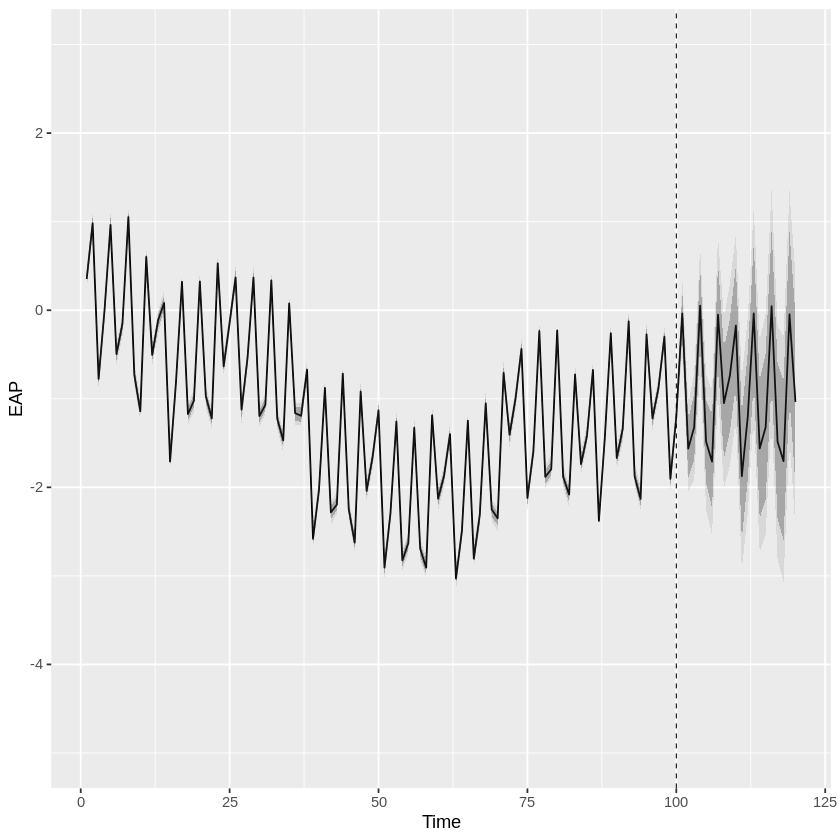

In [35]:
#予測と作図
# 図 4.11 ローカルレベルモデル（上）
resultMCMC <- rstan::extract(fit3)
mu_EAP <- apply(resultMCMC$mu_all,2,mean)
muLower80 <- apply(resultMCMC$mu_all,2,function(x) quantile(x,0.1))  #上側2.5%点
muUpper80 <- apply(resultMCMC$mu_all,2,function(x) quantile(x,0.9))  #下側2.5%点
muLower95 <- apply(resultMCMC$mu_all,2,function(x) quantile(x,0.025))  #上側2.5%点
muUpper95 <- apply(resultMCMC$mu_all,2,function(x) quantile(x,0.975))  #下側2.5%点

# プロット(95%信用区間もプロットする)
result <- data.frame(Time=1:(dat$N +dat$N_pred),
                     EAP=mu_EAP, lower80=muLower80, upper80=muUpper80, lower95=muLower95, upper95=muUpper95)
g <- ggplot(data=result, aes(x=Time, y=EAP))
g <- g + geom_line(aes(y=EAP), lwd=.5)
g <- g +geom_ribbon(aes(ymin=lower80,ymax=upper80), alpha=.3) +geom_ribbon(aes(ymin=lower95,ymax=upper95), alpha=.1)
g <- g + geom_vline(xintercept=100,linetype="dashed",size=.3)
g <- g + scale_y_continuous(limits = c(-5, 3))
plot(g)



# 図 4.11 ローカル線形トレンドモデル（中）
# 事後期待値（EAP）と信頼区間の算出
resultMCMC <- rstan::extract(fit4)
mu_EAP <- apply(resultMCMC$mu_all,2,mean)
muLower80 <- apply(resultMCMC$mu_all,2,function(x) quantile(x,0.1))  #上側2.5%点
muUpper80 <- apply(resultMCMC$mu_all,2,function(x) quantile(x,0.9))  #下側2.5%点
muLower95 <- apply(resultMCMC$mu_all,2,function(x) quantile(x,0.025))  #上側2.5%点
muUpper95 <- apply(resultMCMC$mu_all,2,function(x) quantile(x,0.975))  #下側2.5%点

# プロット(95%信用区間もプロットする)
result <- data.frame(Time=1:(dat$N +dat$N_pred),
                     EAP=mu_EAP, lower80=muLower80, upper80=muUpper80, lower95=muLower95, upper95=muUpper95)
g <- ggplot(data=result, aes(x=Time, y=EAP))
g <- g + geom_line(aes(y=EAP), lwd=.5)
g <- g +geom_ribbon(aes(ymin=lower80,ymax=upper80), alpha=.3) +geom_ribbon(aes(ymin=lower95,ymax=upper95), alpha=.1)
g <- g + geom_vline(xintercept=100,linetype="dashed",size=.3)
g <- g + scale_y_continuous(limits = c(-5, 3))
plot(g)



# 図 4.11 季節成分を考慮したローカルレベルモデル（下）
# 事後期待値（EAP）と信頼区間の算出
resultMCMC <- rstan::extract(fit5)
y_mean_EAP <- apply(resultMCMC$y_mean_all,2,mean)
y_meanLower80 <- apply(resultMCMC$y_mean_all,2,function(x) quantile(x,0.1))  #上側2.5%点
y_meanUpper80 <- apply(resultMCMC$y_mean_all,2,function(x) quantile(x,0.9))  #下側2.5%点
y_meanLower95 <- apply(resultMCMC$y_mean_all ,2,function(x) quantile(x,0.025))  #上側2.5%点
y_meanUpper95 <- apply(resultMCMC$y_mean_all,2,function(x) quantile(x,0.975))  #下側2.5%点

# プロット(95%信用区間もプロットする)
result <- data.frame(Time=1:(dat$N +dat$N_pred),
                     EAP=y_mean_EAP, lower80=y_meanLower80, upper80=y_meanUpper80, lower95=y_meanLower95, upper95=y_meanUpper95)
g <- ggplot(data=result, aes(x=Time, y=EAP))
g <- g + geom_line(aes(y=EAP), lwd=.5)
g <- g +geom_ribbon(aes(ymin=lower80,ymax=upper80), alpha=.3) +geom_ribbon(aes(ymin=lower95,ymax=upper95), alpha=.1)
g <- g + geom_vline(xintercept=100,linetype="dashed",size=.3)
g <- g + scale_y_continuous(limits = c(-5, 3))
plot(g)


## 4.2.3 パネルデータの分析

In [14]:
# model6.stanの内容
#ここでstanのコードを文字列として変数に入れる
model6code <- '
data {
  int<lower=2> L;  // 観測点
  int<lower=1> N;  // 個体数
  vector[N] Y[L];  // 体重
}

parameters {
  real gamma;
  vector[N] beta;
  real<lower=0> sigma_R; 
  real<lower=0> sigma_U;
}

model {
  // 事前分布
  gamma ~ normal(0,100);
  sigma_R ~ cauchy(0,5);
  sigma_U ~ cauchy(0,5);
  // 事後分布
  beta ~ normal(gamma, sigma_U);  // レベル2（システムモデル）
  for(i in 1:N)
    Y[,i]~normal(beta[i], sigma_R);  // レベル1（観測モデル）
}
'

In [15]:
# model7.stanの内容
#ここでstanのコードを文字列として変数に入れる
model7code <- '
data {
  int<lower=2> L;  // 観測点
  int<lower=1> N;  // 個体数
  real X[L];   // 時点
  vector[N] Y[L];  // 体重
}

parameters {
  vector[2] gamma;
  vector[2] beta[N];
  cov_matrix[2] Tau;
  real<lower=0> sigma_R; 
}

transformed parameters{
  vector[N] yhat[L];
  for(j in 1:L)
    for(i in 1:N)
      yhat[j,i] = beta[i,1] +beta[i,2]*X[j]; 
}

model {
  gamma ~ normal(0,100);
  sigma_R ~ cauchy(0,5);

  for(i in 1:N){
    beta[i,] ~ multi_normal(gamma, Tau);
    Y[,i]~normal(yhat[,i], sigma_R);
  }
}
'

In [16]:
# 4.2.3 パネルデータの分析

# model7.stanをキックするRコード
library(nlme)
library(ggplot2)
library(tidyr)
library(dplyr)

dat <-BodyWeight[BodyWeight$Diet==1|BodyWeight$Diet==2,]
dat <-dat[dat$Time != 44,]
dat$Time <- (dat$Time-1)/7
dat <- data.frame(dat)
dat %>% select(-Diet) %>%
  pivot_wider(names_from = Rat, values_from = weight) %>%
  select(-Time) -> weight

# リスト化
dat <- list(N = ncol(weight), X=c(1:nrow(weight)), L =nrow(weight), Y = weight)

# stanコードコンパイルと実行
model7 <- stan_model(model_code = model7code,, model_name="ssm7")
fit <- sampling(model7, data=dat, iter=1000, warmup=500, thin=4, chains=4)
summary(fit)



Attaching package: ‘tidyr’


The following object is masked from ‘package:rstan’:

    extract



Attaching package: ‘dplyr’


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





SAMPLING FOR MODEL 'ssm7' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 8.2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.82 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.55507 seconds (Warm-up)
Chain 1:                0.544567 seconds (Sampling)
Chain 1:                2.09964 seconds 

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
gamma[1],255.993018,2.460891e+00,5.754598e+01,117.1505475,227.625820,265.719410,292.574765,3.470817e+02,546.8210,0.9973218
gamma[2],2.789130,6.647362e-02,1.490974e+00,-0.5856203,2.158919,3.031708,3.746074,5.105534e+00,503.0853,1.0025119
"beta[1,1]",242.240079,1.116850e-01,2.457533e+00,237.4845913,240.675012,242.321783,243.786003,2.469929e+02,484.1822,1.0088456
"beta[1,2]",3.344647,1.799515e-02,3.931188e-01,2.5976947,3.084804,3.324139,3.591372,4.119586e+00,477.2396,1.0010609
"beta[2,1]",224.523645,1.329452e-01,2.589180e+00,219.6944301,222.631543,224.554850,226.199693,2.295528e+02,379.2969,1.0034102
"beta[2,2]",2.270767,2.066145e-02,4.296659e-01,1.4133724,1.950697,2.286831,2.569419,3.089266e+00,432.4544,1.0000189
"beta[3,1]",244.550233,1.241665e-01,2.653600e+00,239.4737535,242.714511,244.582352,246.128458,2.497370e+02,456.7326,1.0046276
"beta[3,2]",2.723511,2.011992e-02,4.380085e-01,1.8209357,2.440727,2.743433,3.021682,3.561313e+00,473.9281,1.0051382
"beta[4,1]",253.589617,1.268565e-01,2.554678e+00,248.4847651,252.001800,253.529210,255.243433,2.589646e+02,405.5519,0.9955135
"beta[4,2]",2.273637,2.040832e-02,4.230389e-01,1.3875444,1.988778,2.286241,2.567806,3.086055e+00,429.6809,0.9963915


## 4.2.4 多変量時系列の解析

In [17]:
# model8.stanの内容
#ここでstanのコードを文字列として変数に入れる
model8code <- '
data {
  int<lower=3> N;  // 観測点
  vector[N] X;  // x座標
  vector[N] Y;  // y座標
}

parameters {
  vector[N] muX;  // ｘ座標推定値
  vector[N] muY;  // y座標推定値
  real <lower=0,upper=1> gamma;
  real <lower=0> sigma_V; // 観測ノイズ
  real <lower=0> sigma_W;  // システムノイズ（xy方向）
  real <lower=0,upper=1> theta; // 角度（0〜1）
}

transformed parameters {
  real<lower=-pi(), upper=pi()> degree;
  degree = (2*theta-1)*pi();
}

model {
  // 事前分布
  sigma_W ~ cauchy(0,5);
  sigma_V ~ cauchy(0,5);
  theta ~ beta(1,1);
  gamma ~ beta(1,1);
  muX ~ normal(0,100);
  muY ~ normal(0,100);

  // Correlated Random Walkモデル
   for (t in 3:N) {
          muX[t] ~ normal(muX[t-1] + gamma*((cos(degree)*(muX[t-1]- muX[t-2])) - (sin(degree)*(muY[t-1]- muY[t-2]))), sigma_W);
          muY[t] ~normal( muY[t-1] + gamma*((sin(degree)*(muX[t-1]- muX[t-2])) + (cos(degree)*(muY[t-1]- muY[t-2]))), sigma_W);
  }
  
  // 観測モデル
  X ~ normal(muX, sigma_V);
  Y ~ normal(muY, sigma_V);
}

'


SAMPLING FOR MODEL 'ssm8' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.9 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 2.98867 seconds (Warm-up)
Chain 1:                3.92775 seconds (Sampling)
Chain 1:                6.91642 s

[1] "gamma: 0.894 (95%CI= (0.734818, 0.983] )"

[1] "sigma_V: 0.009 (95%CI=[0.008,0.011])"

[1] "sigma_W: 0.006 (95%CI=[0.004,0.009])"

[1] "theta: 0.089 (95%CI=[-0.035,0.214])"

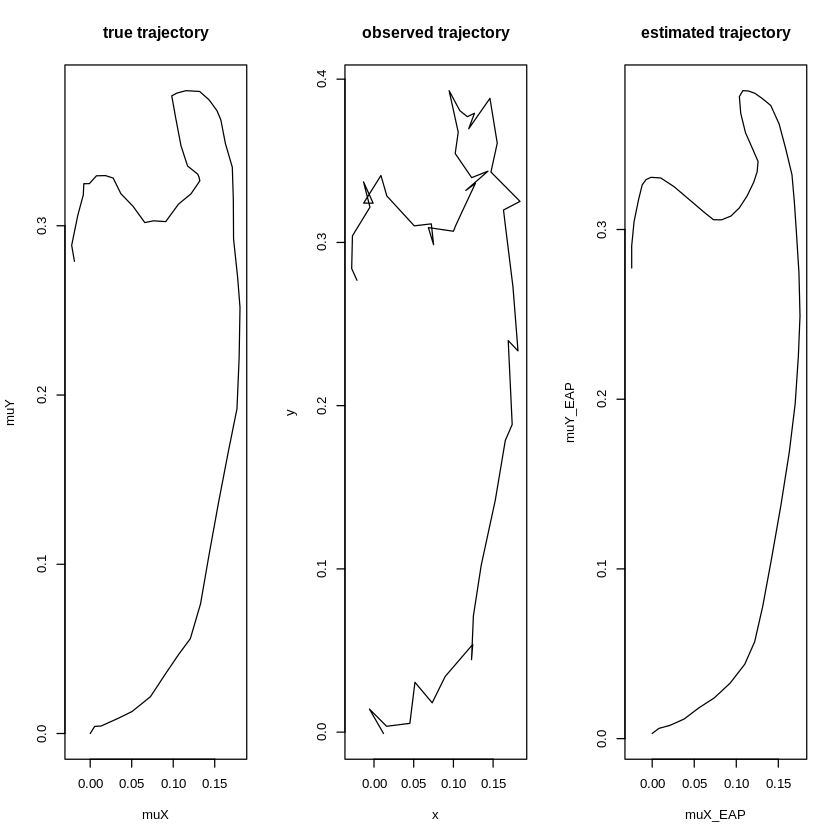

In [18]:
# 4.2.4 多変量時系列の解析

# 軌跡のシミュレーション
set.seed(9999)
N <- 50 # 時点数
gamma <- 0.95 # 速度にかかる係数
sigma_V <- 0.01 # 観測ノイズ
sigma_W <- 0.005 # システムノイズ
degree <- 0.01 # 曲がる角度(rad)
x <- y <- muX <- muY <- rep(NA, N)

# CRWモデルに基づく軌跡
muX[1] <- muY[1] <- 0
muX[2] <- rnorm(1, muX[1], sigma_W)
muY[2] <- rnorm(1, muY[1], sigma_W)
for (t in 3:N){
  muX[t] <- rnorm(1, muX[t-1]
                  + gamma*((cos(degree)*(muX[t-1]-muX[t-2]))
                           - (sin(degree)*(muY[t-1]-muY[t-2]))), sigma_W)
  muY[t] <- rnorm(1, muY[t-1]
                  + gamma*((sin(degree)*(muX[t-1]-muX[t-2]))
                           + (cos(degree)*(muY[t-1]-muY[t-2]))), sigma_W)
}

# 観測値の作成
for (t in 1:N){
  x[t] <- rnorm(1,muX[t],sigma_V)
  y[t] <- rnorm(1,muY[t],sigma_V)
}

# リスト化
dat <- list(N = N, X =x, Y = y)


# Stanコードコンパイルと実行
model8 <- stan_model(model_code = model8code, model_name="ssm8")
fit <- sampling(model8, data=dat, iter=4000, warmup=2000, thin=4,
                chains=4)
# 事後期待値（EAP）
resultMCMC <- rstan::extract(fit)
muX_EAP <- apply(resultMCMC$muX,2,mean)
muY_EAP <- apply(resultMCMC$muY,2,mean)
par(mfrow=c(1,3))
plot(muX,muY,type="l", main="true trajectory")
plot(x,y,type="l", main="observed trajectory")
plot(muX_EAP , muY_EAP,type="l", main="estimated trajectory")
sprintf("gamma: %.3f (95%%CI= (%f, %.3f] )",
        summary(fit)$summary["gamma","50%"],
        summary(fit)$summary["gamma","2.5%"],
        summary(fit)$summary["gamma","97.5%"]
)
sprintf("sigma_V: %.3f (95%%CI=[%.3f,%.3f])",
        summary(fit)$summary["sigma_V","50%"],
        summary(fit)$summary["sigma_V","2.5%"],
        summary(fit)$summary["sigma_V","97.5%"]
)
sprintf("sigma_W: %.3f (95%%CI=[%.3f,%.3f])",
        summary(fit)$summary["sigma_W","50%"],
        summary(fit)$summary["sigma_W","2.5%"],
        summary(fit)$summary["sigma_W","97.5%"]
)
sprintf("theta: %.3f (95%%CI=[%.3f,%.3f])",
        (((summary(fit)$summary["theta","50%"])*2-1) *pi) ,
        (((summary(fit)$summary["theta","2.5%"])*2-1) *pi) ,
        (((summary(fit)$summary["theta","97.5%"])*2-1) *pi)
)


## 4.3.1 ベルヌーイ分布・二項分布・ポアソン分布の使い分け

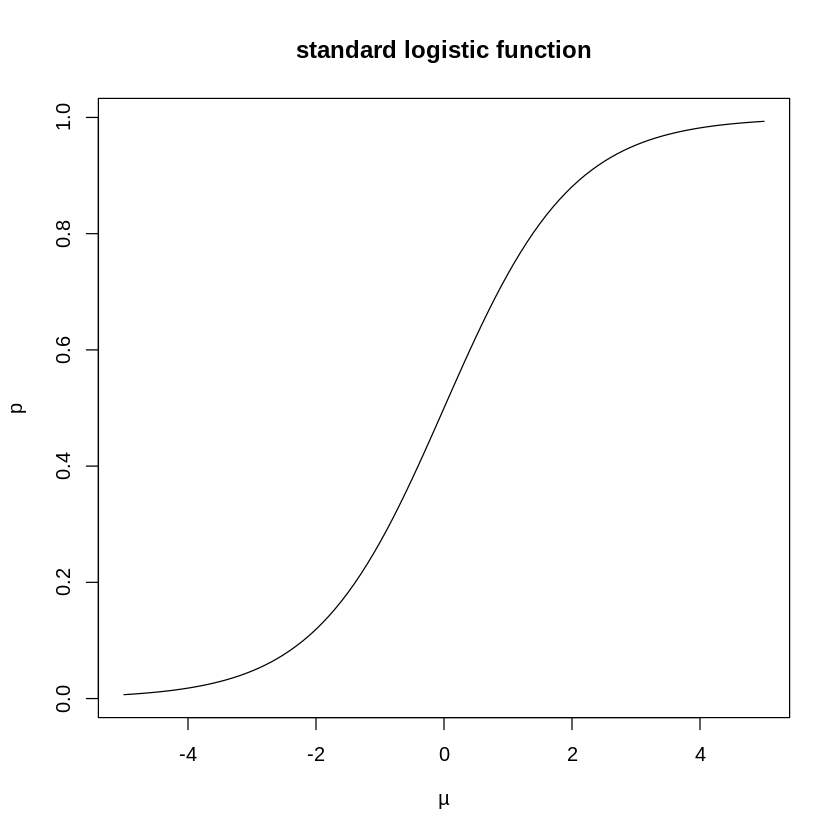

In [19]:
# 4.3.1 ベルヌーイ分布・二項分布・ポアソン分布の使い分け
curve(1/(1 + exp(-x)),-5,5,main="standard logistic function", xlab = expression(mu), ylab="p")

## 4.3.2 観測値が二項分布に従うモデル

In [20]:
# model9.stanの内容
#ここでstanのコードを文字列として変数に入れる
model9code <- '
data{
  int N; // データ総数
  int Attend[N]; // 週毎の出席数
  int Check[N]; // 週毎の出席をとった回数
}

parameters{
  vector[N] mu;
  real<lower=0> sigma; 
}

transformed parameters {
  vector<lower=0, upper=1>[N] theta; // 各時点の出席率
  theta = inv_logit(mu); // ロジスティック関数
}

model{
  sigma ~ cauchy(0,5); 
  for (i in 2:N)
    mu[i]~normal(mu[i-1], sigma); 

  for(i in 1:N)
    Attend[i] ~ binomial(Check[i], theta[i]);
}

'


SAMPLING FOR MODEL 'ssm9' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000118 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.18 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 70.3799 seconds (Warm-up)
Chain 1:                69.5592 seconds (Sampling)
Chain 1:                139.9

Warning message:
“There were 3 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“There were 809 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”
Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.25, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https

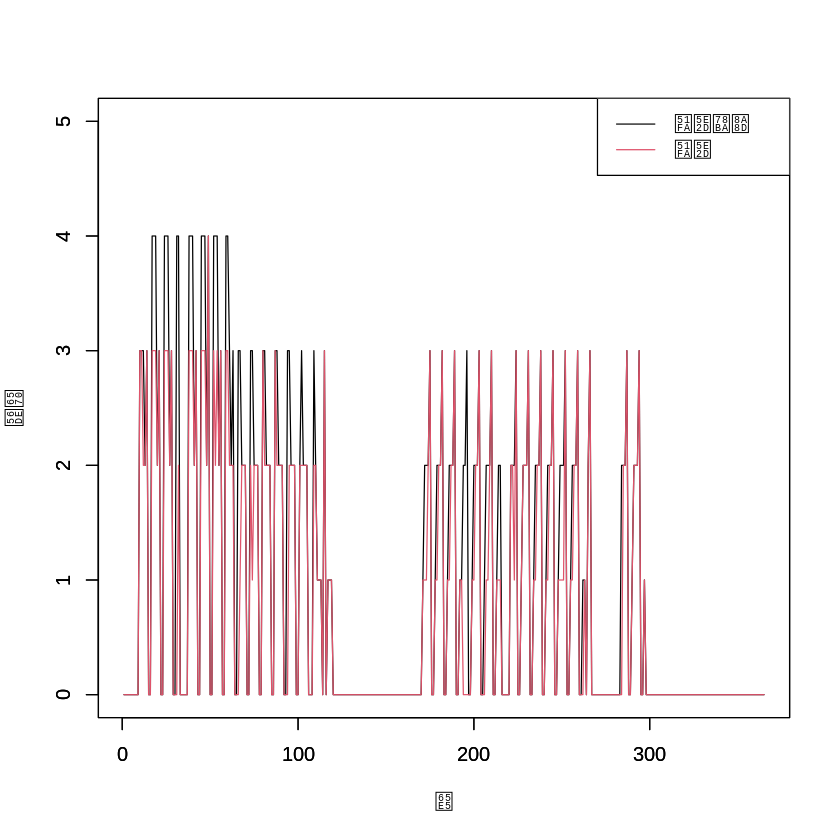

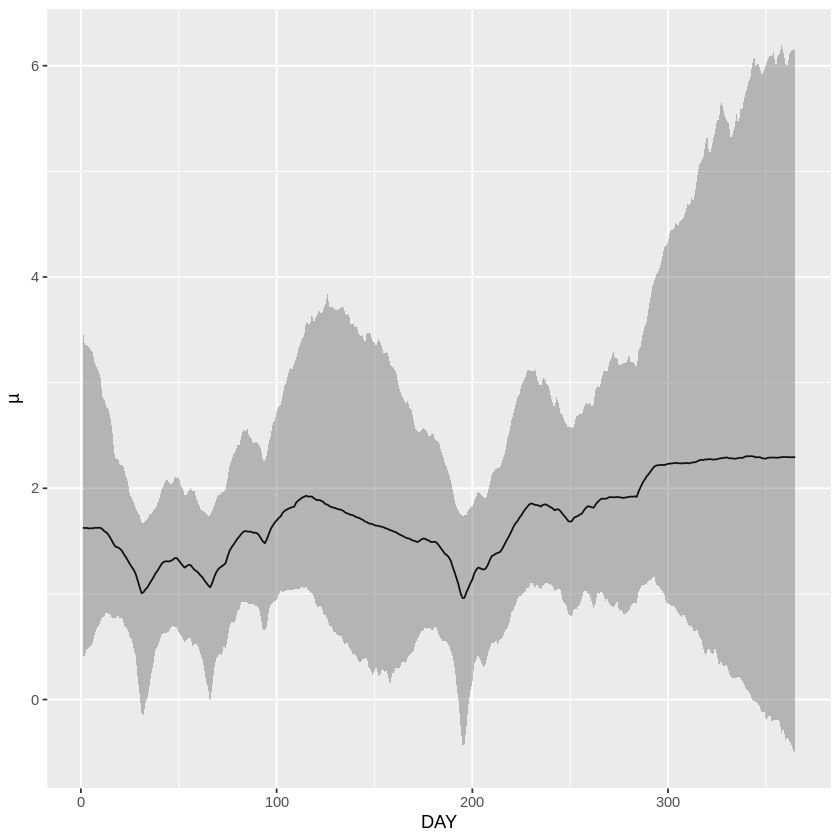

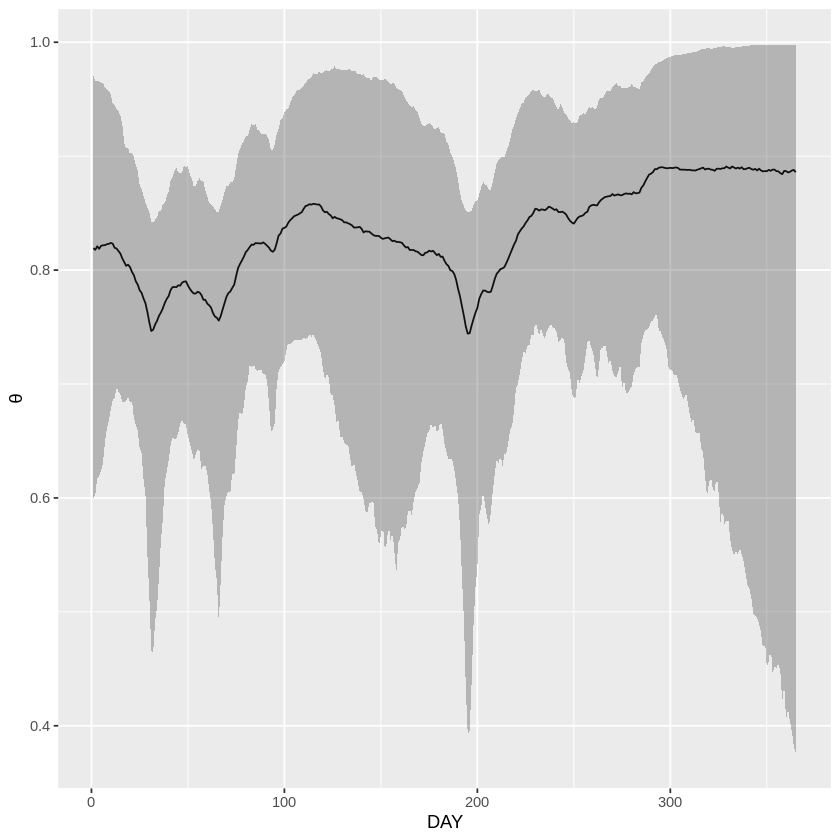

In [21]:
# 4.3.2 観測値が二項分布に従うモデル

#日毎の出席確認回数
check <- c(0,0,0,0,0,0,0,0,0,3,3,3,2,3,0,0,4,4,4,2,3,0,0,4,4,4,2,3,0,0,4,4,0,0,0,0,0,4,4,4,2,
            3,0,0,4,4,4,2,4,0,0,4,4,4,2,3,0,0,4,4,3,2,3,0,0,3,3,2,2,2,0,0,3,3,2,2,2,0,0,3,3,2,
            2,2,0,0,3,3,2,2,2,0,0,3,3,2,2,2,0,0,2,3,2,2,2,0,0,0,3,2,1,1,1,0,3,0,1,1,1,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,1,2,2,2,3,0,0,1,2,2,2,3,0,0,1,2,2,2,3,0,0,1,1,2,2,3,0,0,1,2,2,2,3,0,0,
            1,2,2,2,3,0,0,1,2,2,0,0,0,0,0,2,2,2,3,0,0,1,2,2,2,3,0,0,1,2,2,2,3,0,0,1,2,2,2,3,0,
            0,1,2,2,2,3,0,0,1,2,2,2,3,0,0,1,1,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,
            0,0,1,2,2,2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
#日毎の出席回数
attend <- c(0,0,0,0,0,0,0,0,0,3,3,2,2,3,0,0,3,3,3,2,3,0,0,3,3,3,2,3,0,0,0,2,0,0,0,0,0,3,3,3,2,
            3,0,0,3,3,3,2,4,0,0,3,2,3,2,3,0,0,3,3,2,2,2,0,0,0,1,2,2,2,0,0,2,1,2,2,2,0,0,3,2,2,
            2,2,0,0,3,2,2,2,2,0,0,0,2,2,2,2,0,0,2,2,2,2,2,0,0,0,2,2,1,1,1,0,3,0,1,1,1,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,1,1,1,2,3,0,0,1,1,2,2,3,0,0,1,1,2,2,3,0,0,1,1,0,0,0,0,0,1,1,2,2,3,0,0,
            0,1,1,2,3,0,0,1,1,1,0,0,0,0,0,2,2,1,3,0,0,1,2,2,2,3,0,0,1,1,2,2,3,0,0,1,1,2,2,3,0,
            0,1,1,1,1,3,0,0,1,1,2,2,3,0,0,0,1,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,
            0,0,1,2,2,2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

#リスト化
dat <- list(N=length(check), Attend = attend, Check = check)
plot(check, type="l", ylim=c(0,5), ylab="", xlab="日")
par(new =T)
plot(attend, type="l", ylim=c(0,5), col=2, ylab="回数", xlab="")
labels <- c("出席確認","出席")
legend("topright", legend = labels, col = c(1,2), lty = c(1,1))

# Stanの実行
dat <- list(N=length(check), Attend = attend, Check = check)
model9 <- stan_model(model_code = model9code, model_name="ssm9")
fit <- sampling(model9, data=dat, iter=4000, warmup=2000, thin=4, chains=4)

# 出席意欲μの事後期待値（EAP）（左）と出席率θの事後中央値（MED）
resultMCMC <- rstan::extract(fit)
mu_EAP <- apply(resultMCMC$mu,2,mean)
muLower95 <- apply(resultMCMC$mu,2,function(x) quantile(x,0.025))  #下側2.5%点
muUpper95 <- apply(resultMCMC$mu,2,function(x) quantile(x,0.975))  #上側2.5%点

theta_50 <- apply(resultMCMC$theta,2,median)
thetaLower95 <- apply(resultMCMC$theta,2,function(x) quantile(x,0.025))  #下側2.5%点
thetaUpper95 <- apply(resultMCMC$theta,2,function(x) quantile(x,0.975))  #上側2.5%点

# 描画 
# 意欲μ
result_mu <- data.frame(Time=1:length(check),EAP=mu_EAP, lower=muLower95, upper=muUpper95)
g <- ggplot(data=result_mu, aes(x=Time, y=EAP))
g <- g + geom_line(aes(y=EAP), lwd=.5)
g <- g +geom_ribbon(aes(ymin=lower,ymax=upper), alpha=.3)+ labs(x="DAY", y=expression(mu))
plot(g)

# 出席確率θ
result_theta <- data.frame(Time=1:length(check),　THETA=theta_50, lower=thetaLower95, upper=thetaUpper95)
g <- ggplot(data=result_theta, aes(x=Time, y=THETA))
g <- g + geom_line(aes(y=THETA), lwd=.5)
g <- g +geom_ribbon(aes(ymin=lower,ymax=upper), alpha=.3)+ labs(x="DAY", y=expression(theta))
plot(g)


## 4.3.3 観測値がポアソン分布に従うモデル

In [22]:
# model10.stanの内容
#ここでstanのコードを文字列として変数に入れる
model10code <- '
data {
  int N;  // サンプリング点数
  int Y[N];  // 観測値の時系列
  vector[N] IV; // 介入の有無（0:介入なし，1:介入あり）
}
parameters {
  vector[N] mu; //μ 
  vector[N] season;  // 季節調整項
  real<lower=0> sigma_S;  // muのシステムノイズ
  real<lower=0> sigma_season; // 季節成分のノイズ
  real k; // 介入効果の係数
}
transformed parameters{
  vector[N] lambda;
  lambda =  exp(mu + season + k*IV);
}
model {
  for (t in 2:N)
    mu[t] ~ normal(mu[t-1], sigma_S);
  // 季節成分：11ヶ月前から1ヶ月前までの合計値に−1をかけた値になると考える
  for (i in 12:N)
    season[i] ~ normal(-sum(season[(i-11):(i-1)]), sigma_season);
  // 観測モデル
  Y ~ poisson(lambda);
}
generated quantities {
  int y_pred[N];
  y_pred = poisson_rng(exp(mu + k*IV));
}

'


SAMPLING FOR MODEL 'ssm10' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.8e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  800 / 8000 [ 10%]  (Warmup)
Chain 1: Iteration: 1600 / 8000 [ 20%]  (Warmup)
Chain 1: Iteration: 2001 / 8000 [ 25%]  (Sampling)
Chain 1: Iteration: 2800 / 8000 [ 35%]  (Sampling)
Chain 1: Iteration: 3600 / 8000 [ 45%]  (Sampling)
Chain 1: Iteration: 4400 / 8000 [ 55%]  (Sampling)
Chain 1: Iteration: 5200 / 8000 [ 65%]  (Sampling)
Chain 1: Iteration: 6000 / 8000 [ 75%]  (Sampling)
Chain 1: Iteration: 6800 / 8000 [ 85%]  (Sampling)
Chain 1: Iteration: 7600 / 8000 [ 95%]  (Sampling)
Chain 1: Iteration: 8000 / 8000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 18.4614 seconds (Warm-up)
Chain 1:                138.177 seconds (Sampling)
Chain 1:               

Warning message:
“There were 211 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“There were 1488 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”
Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.06, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
ht

named numeric(0)

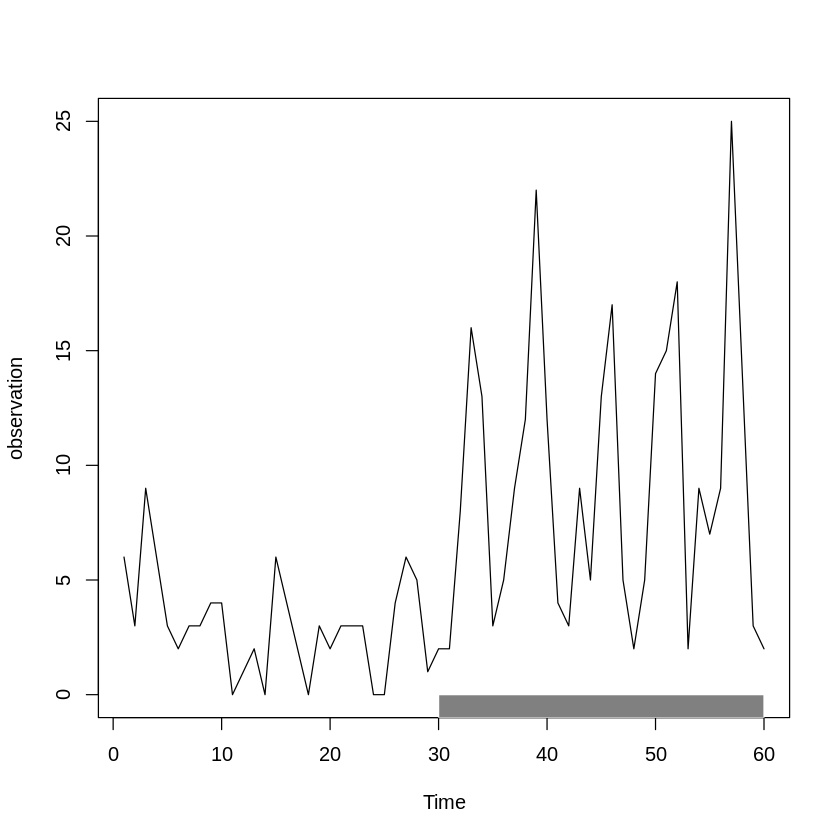

[1] "k: 1.170 (95%CI= (0.523042, 1.652] )"

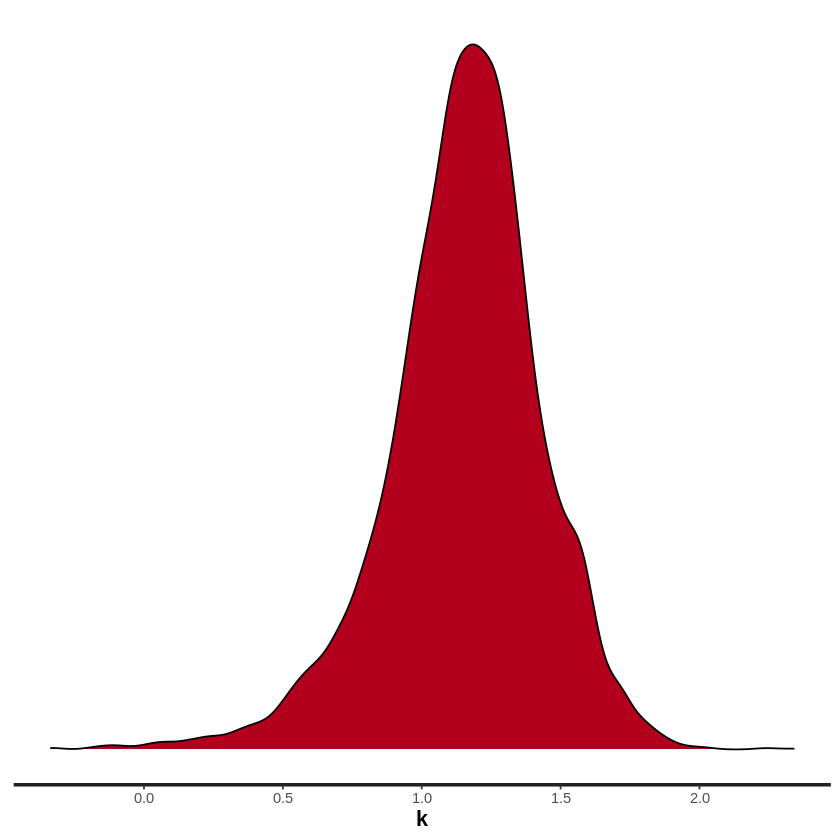

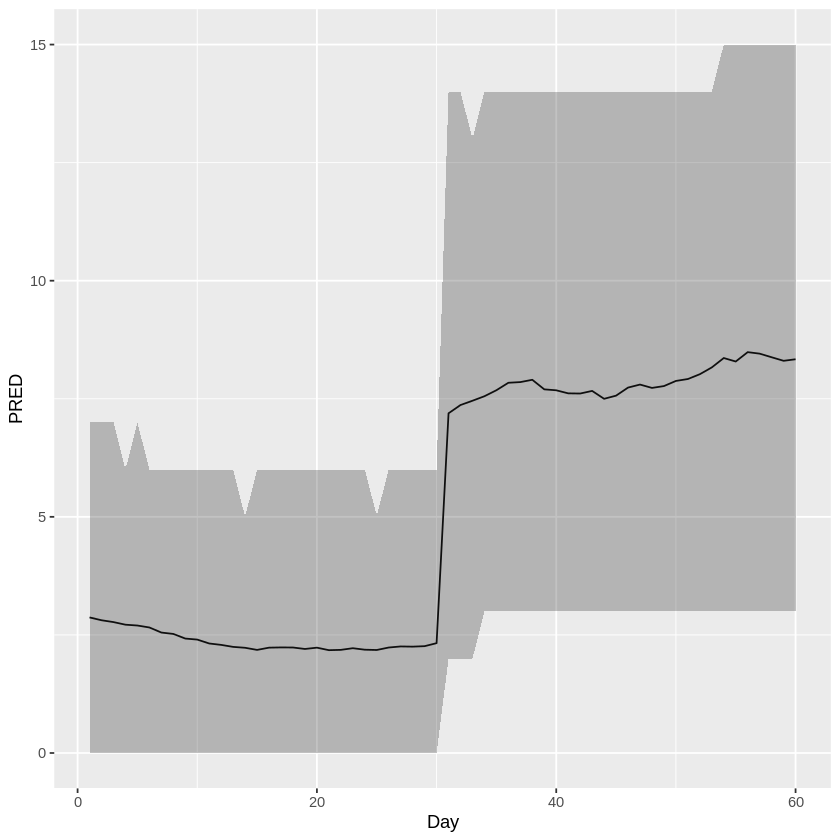

In [23]:
# 4.3.3 観測値がポアソン分布に従うモデル

# データの準備
set.seed(1234)
N <- 60 #期間
#周期成分を適当に作成しこれを季節成分とする
#１２ヶ月周期のフーリエ級数の第2調和まで考慮している
#5年分の周期成分を作成
set.seed(1234)
p <- numeric(60)
t <- 1:12
for(i in 1:2){
  p <- (runif(1)*2-1) * cos(i*t) + (runif(1)*2-1) * sin(i*t) + p
}

#介入系列
IV <- c(rep(0,30), rep(1,30)) 
mu_0 <- 1     # 状態初期値
sigma_W <- 0.1  # muの標準偏差
sigma_A <- 0.1  #介入効果の標準偏差
mu_A <- 1 #介入効果の平均値
#介入効果
a <- rnorm(n = N, mean = mu_A, sd = sigma_A) * IV
mu = rnorm(n = N, mean = mu_0 , sd = sigma_W)
observation <- rpois(n = N, lambda = exp(mu+p+a) )
ts.plot(observation)
rect(30,-1,60,0,col=grey(0.5),border=F)


# Stanの実行 
dat <- list(N=N, Y=observation, IV= IV)
model10 <- stan_model(model_code = model10code, model_name="ssm10")
fit <- sampling(model10, data=dat, iter=8000, warmup=2000, thin=4, chains=4)


# 介入効果の検討
# 収束診断
summary_fit <- summary(fit)$summary[,"Rhat"]
summary_fit[summary_fit > 1.1]  #収束していれば何も表示されない

#介入効果
stan_dens(fit, pars="k", separate_chains = FALSE) #事後分布の密度
sprintf("k: %.3f (95%%CI= (%f, %.3f] )",
        summary(fit)$summary["k","50%"],
        summary(fit)$summary["k","2.5%"],
        summary(fit)$summary["k","97.5%"]
)


# 予測分布
resultMCMC <- rstan::extract(fit)
y_PRED <- apply(resultMCMC$y_pred,2,mean)
yLower95 <- apply(resultMCMC$y_pred,2,function(x) quantile(x,0.025))  #下側2.5%点
yUpper95 <- apply(resultMCMC$y_pred,2,function(x) quantile(x,0.975))  #上側2.5%点

result <- data.frame(Day=(1: dat$N),
                     PRED=y_PRED, lower=yLower95, upper=yUpper95)
g <- ggplot(data=result, aes(x=Day, y=PRED))
g <- g + geom_line(aes(y=PRED), lwd=.5)
g <- g +geom_ribbon(aes(ymin=lower,ymax=upper), alpha=.3)
plot(g)

## 4.4.2 変化点モデル

In [24]:
# model11.stanの内容
#ここでstanのコードを文字列として変数に入れる
model11code <- '
data {
  int N;
  vector[N] Y;
}

parameters {
  vector[N] mu;
  real<lower=0> sigma_W;
  real<lower=0> sigma_O;
  real diff;  // 効果
  real<lower=1, upper=N> cp; // 変化点
}

transformed parameters {
  vector[N] mu1;
  for (t in 1:N)
    mu1[t] = mu[t] + ((cp < t) ? diff : 0);  // 三項演算子による条件分岐
}

model {
  sigma_W ~ cauchy(0,5); 
  sigma_O ~ cauchy(0,5); 
  
  for (t in 2:N){
    mu[t] ~ normal(mu[t-1], sigma_W);
  }
  Y ~ normal(mu1, sigma_O);
}

'


SAMPLING FOR MODEL 'ssm11' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 3.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 8000 [  0%]  (Warmup)
Chain 1: Iteration:  800 / 8000 [ 10%]  (Warmup)
Chain 1: Iteration: 1600 / 8000 [ 20%]  (Warmup)
Chain 1: Iteration: 2001 / 8000 [ 25%]  (Sampling)
Chain 1: Iteration: 2800 / 8000 [ 35%]  (Sampling)
Chain 1: Iteration: 3600 / 8000 [ 45%]  (Sampling)
Chain 1: Iteration: 4400 / 8000 [ 55%]  (Sampling)
Chain 1: Iteration: 5200 / 8000 [ 65%]  (Sampling)
Chain 1: Iteration: 6000 / 8000 [ 75%]  (Sampling)
Chain 1: Iteration: 6800 / 8000 [ 85%]  (Sampling)
Chain 1: Iteration: 7600 / 8000 [ 95%]  (Sampling)
Chain 1: Iteration: 8000 / 8000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 26.418 seconds (Warm-up)
Chain 1:                88.3193 seconds (Sampling)
Chain 1:                

Warning message:
“There were 257 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“There were 3448 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


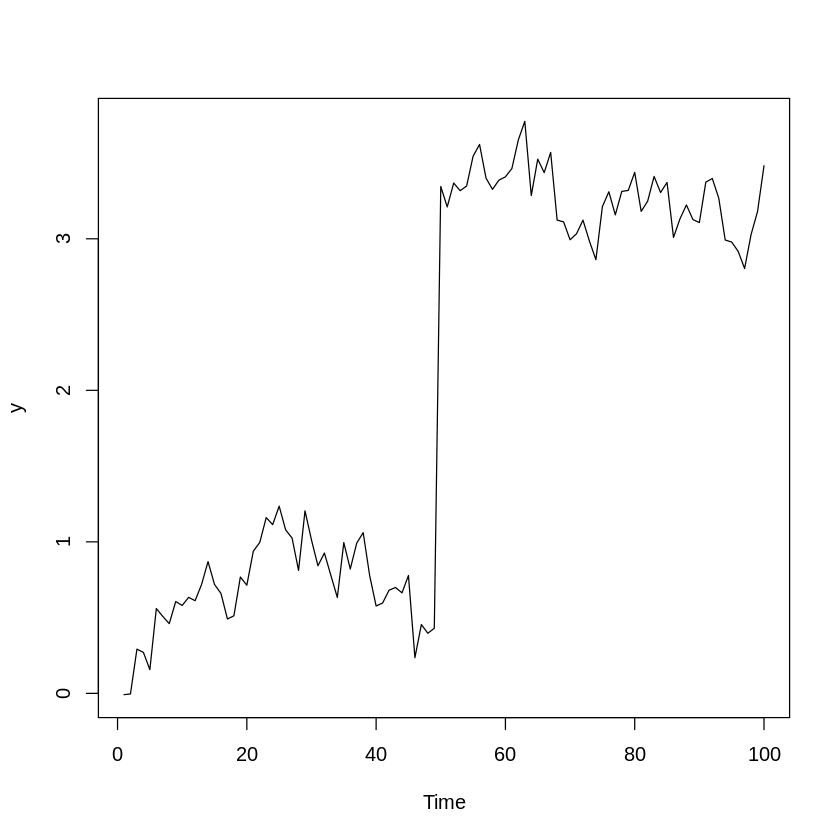

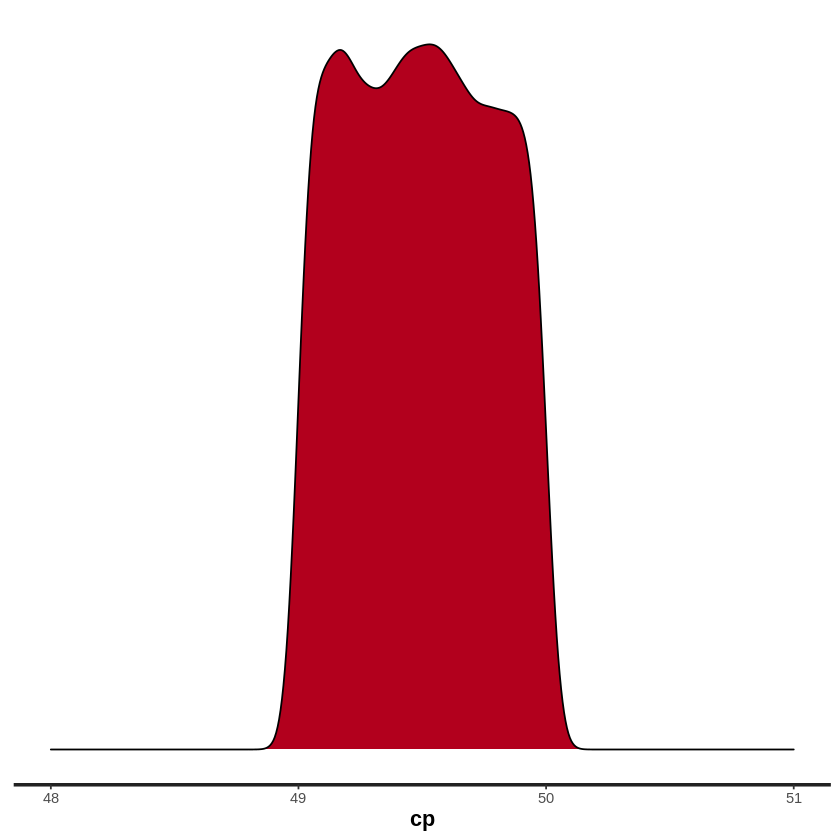

In [25]:
# 4.4.2 変化点モデル

# データの作成
set.seed(9999)
N <- 100  # 期間
cp <- 50
mu_0 <- 0     # 状態初期値
sigma_W <- .1  # システムノイズの標準偏差
sigma_O <- .1  # 観測ノイズの標準偏差
a <- 3  #　介入効果の大きさ

# 状態の初期値
mu <- y <- rep(NA, N)
mu[1] <- mu_0

#change pointが発生する日
cp <- 50

# データの生成
for(i in 2:N){
  if(i == cp){
    mu[i] <- rnorm(n = 1, mean = mu[i-1] + a, sd = sigma_W)
  }else{
    mu[i] <- rnorm(n = 1, mean = mu[i-1], sd = sigma_W)
  }
}

for(i in 1:N){
  y[i] <- rnorm(n = 1, mean = mu[i], sd = sigma_O)
}
ts.plot(y)
dat <- list(N=N, Y=y)


# Stanの実行
model11 <- stan_model(model_code = model11code, model_name="ssm11")
fit <- sampling(model11, data=dat, iter=8000, warmup=2000, thin=4, chains=4)

stan_dens(fit, pars="cp", separate_chains = FALSE)  +  scale_x_continuous(limits = c(48, 51)) #　事後分布の密度


## 4.4.3 隠れマルコフモデル

In [26]:
# model12.stanの内容
#ここでstanのコードを文字列として変数に入れる
model12code <- '
data {
  int<lower=1> K;  // 状態の種類
  int<lower=1> N;  // 時点の数
  real Y[N];  // 観測値
  vector<lower=0>[3] alpha;  // 遷移確率の初期値
}
parameters {
  simplex[K] theta[K];  // 遷移確率行列
  ordered[K] mu;  // muと状態kの対応関係がchainごとに異なるのを防ぐためordered型で宣言
  vector<lower=0,upper=100>[K] sigma;
}
model {
  real acc[K];
  real gamma[N, K];
  // 事前分布
  for (k in 1:K)
    theta[k] ~ dirichlet(alpha);
  mu ~ normal(0, 100);
  sigma ~ cauchy(0,5);
  
  //尤度
  for (k in 1:K)
    gamma[1, k] = normal_lpdf(Y[1] | mu[k], sigma[k]);
  
  for (t in 2:N) {
    for (k in 1:K) {
      for (j in 1:K)
        acc[j] = gamma[t-1,j]+log(theta[j, k])+normal_lpdf(Y[t] | mu[k], sigma[k]);
      gamma[t,k] = log_sum_exp(acc);
    }
  }
  target += log_sum_exp(gamma[N,]);
}

// ビタビ・アルゴリズム
generated quantities {
  int<lower=1, upper=K> y_star[N]; 
  real log_p_y_star;
  
  {
    int back_ptr[N,K]; 
    real best_logp[N,K];
    real best_total_logp;
    
    for (k in 1:K)
      best_logp[1,k] = normal_lpdf(Y[1] | mu[k], sigma[k]); 
    for (t in 2:N) {
      for (k in 1:K) {
          best_logp[t,k] = negative_infinity();
          for (j in 1:K) {
            real logp;
            logp=best_logp[t-1,j]+log(theta[j,k])+normal_lpdf(Y[t]|mu[k], sigma[k]);
            if (logp > best_logp[t,k]) {
              back_ptr[t,k] = j;
              best_logp[t,k] = logp;
            }
          }
        }
      }
      log_p_y_star = max(best_logp[N]);
      
      for (k in 1:K)
        if (best_logp[N,k] == log_p_y_star)
          y_star[N] = k;
      for (t in 1:(N - 1))
        y_star[N - t] = back_ptr[N-t+1, y_star[N-t+1]];
  }
}

'


SAMPLING FOR MODEL 'hmm' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000184 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.84 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 6000 [  0%]  (Warmup)
Chain 1: Iteration:  600 / 6000 [ 10%]  (Warmup)
Chain 1: Iteration: 1200 / 6000 [ 20%]  (Warmup)
Chain 1: Iteration: 1800 / 6000 [ 30%]  (Warmup)
Chain 1: Iteration: 2400 / 6000 [ 40%]  (Warmup)
Chain 1: Iteration: 3000 / 6000 [ 50%]  (Warmup)
Chain 1: Iteration: 3001 / 6000 [ 50%]  (Sampling)
Chain 1: Iteration: 3600 / 6000 [ 60%]  (Sampling)
Chain 1: Iteration: 4200 / 6000 [ 70%]  (Sampling)
Chain 1: Iteration: 4800 / 6000 [ 80%]  (Sampling)
Chain 1: Iteration: 5400 / 6000 [ 90%]  (Sampling)
Chain 1: Iteration: 6000 / 6000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 13.324 seconds (Warm-up)
Chain 1:                31.6897 seconds (Sampling)
Chain 1:                45.0138

Warning message:
“The largest R-hat is 1.18, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


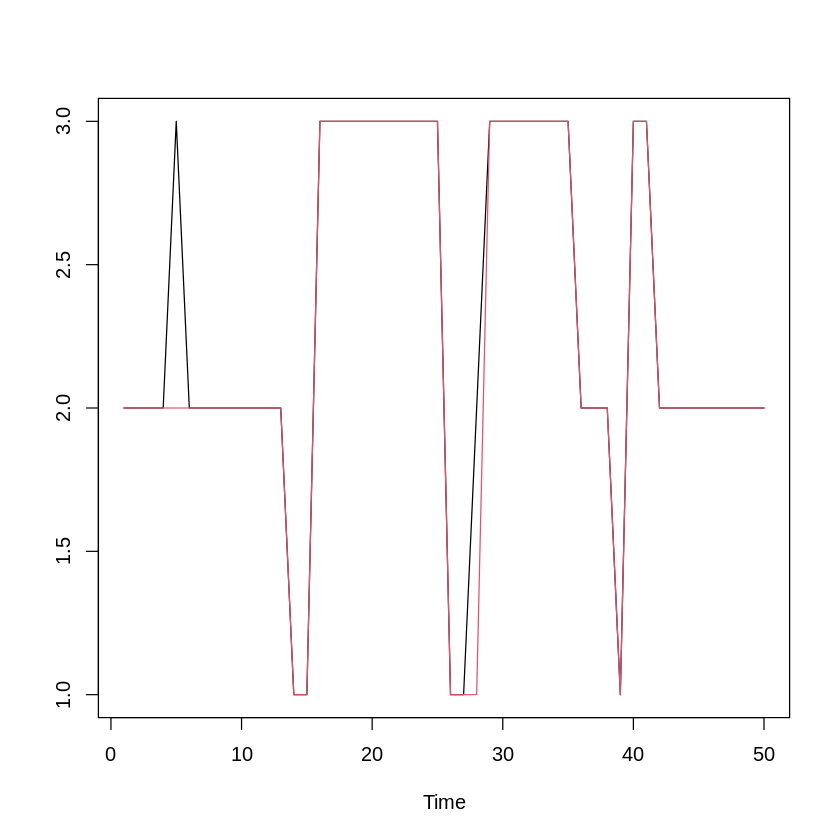

In [27]:
# 4.4.3 隠れマルコフモデル

# 仮想データの作成
set.seed(1234)
N <- 50 # 50時点のデータを作成します
# 仮想データの遷移確率
P <- matrix(c(0.8, 0.1, 0.2,
              0.1, 0.8, 0.2,
              0.1, 0.1, 0.6), ncol = 3)
# レジームごとの潜在変数の値
mu <- c(0, 5.0, 10.0)
# レジームごとの観測ノイズ
sigma <- c(1.0, 1.0, 1.0)
# 仮想データの作成
y <- z <- rep(NA, N)
# レジームの遷移
z[1] <- sample(x=c(1,2,3), size=1, replace = T, prob=c(1/3,1/3,1/3))
for (i in 2:N){
  z[i] <- sample(x=c(1,2,3), size=1, replace = T, prob=P[z[i-1], ])
}
# 観測ノイズを加えて観測値を生成する
for(i in 1:N)
  y[i] <- rnorm(1, mu[z[i]], sigma[z[i]])


# リスト化
dat <- list(K=3,
            N=N,
            Y=y,
            alpha =c(1/3, 1/3, 1/3)
)


# Stanコードコンパイルと実行
model12 <- stan_model(model_code = model12code, model_name="hmm")
fit <- sampling(model12, data=dat, iter=6000, warmup=3000, thin=5,chains=4)
resultMCMC <- rstan::extract(fit)

# 最頻値を求める関数
statmode <- function(x) {
  names(which.max(table(x)))
}
state <- apply(resultMCMC$y_star,2,statmode)
# 作図（黒線が真の状態，赤線が推定された状態）
ts.plot(as.ts(z), as.ts(state), col=c(1:2))


## 4.5.1 WAIC

In [28]:
# model13.stanの内容
#ここでstanのコードを文字列として変数に入れる
model13code <- '
data {
  int N;  // サンプリング点数
  vector[N] Y;  // 観測値の時系列
}

parameters {
  vector[N] mu; //推定値μ
  real<lower=0> sigma_S;  // μのシステムノイズ
  real<lower=0> sigma_O;  // 観測ノイズ
}

model {
  // システムモデル
  for(t in 2:N){
    mu[t] ~ normal(mu[t-1], sigma_S);
  }

  // 観測モデル
  Y ~ normal(mu, sigma_O);
}

generated quantities{
  real log_lik[N];
  for(i in 1:N){
    log_lik[i] = normal_lpdf(Y[i]| mu[i], sigma_O);
  }
}

'

In [29]:
# 4.5.1 WAIC

N=100
Y= cumsum(rnorm(N)) # ランダムウォークの時系列を作成
# リスト化
dat <- list(N=N, Y=Y)

# Stanコードコンパイルと実行
model13 <- stan_model(model_code = model13code, model_name="ssm13")
fit <- sampling(model13, data=dat, iter=4000, warmup=2000, thin=4, chains=4)
library(loo)
waic(extract_log_lik(fit))$estimates


SAMPLING FOR MODEL 'ssm13' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.763929 seconds (Warm-up)
Chain 1:                1.59604 seconds (Sampling)
Chain 1:                2.35

Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.16, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”
This is loo version 2.5.1

- Online documentation and vignettes at mc-stan.org/loo

- As of v2.0.0 loo defaults to 1 core but w

,Estimate,SE
elpd_waic,-8.857987,1.614721
p_waic,104.171954,1.510957
waic,17.715974,3.229441


## 4.5.2 時系列分割による交差検証

In [30]:
# 4.5.2 時系列分割による交差検証

library(rsample)
df.cv <- rsample::rolling_origin(
  data.frame(AirPassengers),
  # 最初の訓練用期間を24ヵ月とする
  initial = 24,
  # 検証用期間を12ヵ月とする
  assess = 12,
  # スライドを12ヵ月とする(0のときはスライド1ヵ月)
  skip = 11,
  # TRUE: 交差検証法(1)の方法，FALSE: 交差検証法(2)の方法
  cumulative = T
)

analysis(df.cv$splits[[1]]) # 訓練用データセットの1つ目
assessment(df.cv$splits[[1]]) # 検証用データセットの1つ目

,AirPassengers
,<dbl>
1,112
2,118
3,132
4,129
5,121
6,135
7,148
8,148
9,136


,AirPassengers
,<dbl>
25,145
26,150
27,178
28,163
29,172
30,178
31,199
32,199
33,184
